In [1]:
# First reset the pygkyl library
import sys
!rm -rf ~/personal_gkyl_scripts/pygkyl/pygkyl.egg-info
!rm -rf ~/personal_gkyl_scripts/pygkyl/build
!{sys.executable} -m pip install ~/personal_gkyl_scripts/pygkyl > ~/personal_gkyl_scripts/pygkyl/install.log

import numpy as np
import matplotlib.pyplot as plt
import os

# Configure plotting
plt.rcParams["figure.figsize"] = (5,4)

# Custom libraries and routines
import pygkyl

home_dir = os.path.expanduser("~")
repo_dir = home_dir+'/personal_gkyl_scripts/'

simdir='/pscratch/sd/d/dliu2/main/gkylzero/output_3x2v_3/'
fileprefix='gk_bgk_im_asdex_3x2v_p1'

simulation = pygkyl.simulation_configs.import_config('aug', simdir, fileprefix)

simulation.normalization.set('t','mus') # time in micro-seconds
simulation.normalization.set('y','Larmor radius') # binormal in term of reference sound Larmor radius
simulation.normalization.set('z','pi') # parallel angle devided by pi
simulation.normalization.set('fluid velocities','thermal velocity') # fluid velocity moments are normalized by the thermal velocity
simulation.normalization.set('temperatures','eV') # temperatures in electron Volt
simulation.normalization.set('pressures','Pa') # pressures in Pascal
simulation.normalization.set('energies','MJ') # energies in mega Joules
simulation.normalization.set('gradients','major radius') # gradients are normalized by the major radius

sim_frames = simulation.available_frames['ion_MaxwellianMoments'] # you can check the available frames for each data type like ion_M0, ion_BiMaxwellian, etc.)
print("%g time frames available (%g to %g)"%(len(sim_frames),sim_frames[0],sim_frames[-1]))

  DEPRECATION: Building 'pygkyl' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pygkyl'. Discussion can be found at https://github.com/pypa/pip/issues/6334
344 time frames available (0 to 343)


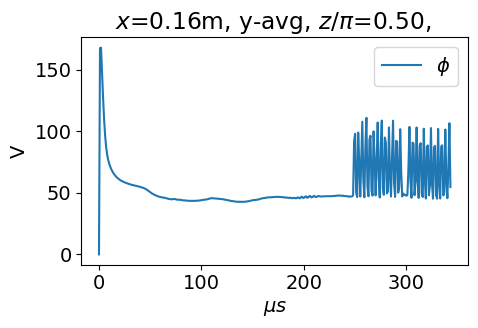

In [2]:
fieldnames = ['phi']
cut_coords = [0.160,'avg',0.5]
time_frames = sim_frames[:]
pygkyl.plot_utils.plot_time_serie(simulation,fieldnames,cut_coords,time_frames)

In [2]:
polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=64)

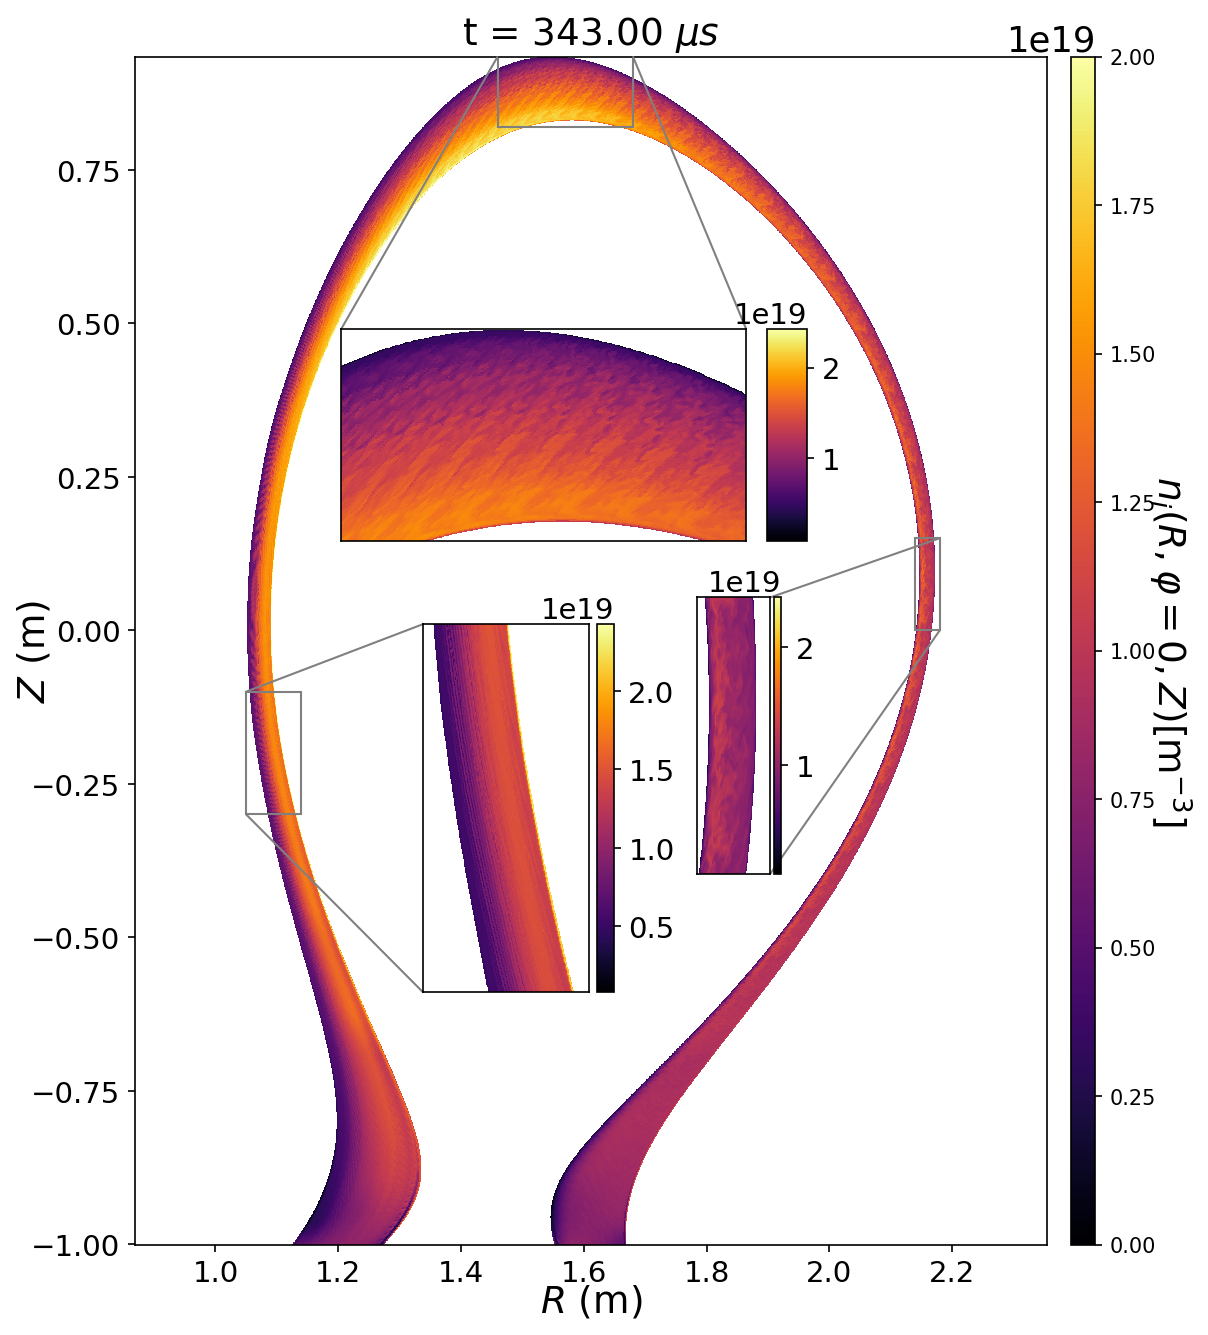

In [3]:
clim = [0.0, 2.0e19]
polproj.plot('ni',timeFrame=sim_frames[-1],colorScale='linear',clim=clim, colorMap='inferno')

In [ ]:
polproj.movie('ni', timeFrames=sim_frames[200:301], moviePrefix=simdir+'/', colorMap='inferno', show_inset=True, clim=[0,2.0e19], colorScale='linear')